# Cuarta preentrega - Curso Data Science INGENIAS

## Integrantes

  * Cristina Betancur
  * Melani Caucota
  * Virginia Chirilá 

## Objetivo

Agrupar personas de acuerdo a características socio-económicas, educativas, demográficas

## Librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.cluster import DBSCAN
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

## Data set

In [2]:
datos = pd.read_csv("encuesta-anual-hogares-2019-transf-2.csv", delimiter=',')

**Datos adultos**

In [3]:
datosadultos = datos[datos["edad"]>=18]

### Filtrar datos de trabajo

Tomamos variables importantes cuidando de no colocar variables correlacionadas o con fuerte asociación

In [4]:
## Filtrar las columnas que nos interesan
datosfiltrados = datosadultos[['dominio', 'edad', 'situacion_conyugal', 'estado_ocupacional',
       'estado_educativo', 'nivel_max_educativo', 'años_escolaridad',
       'lugar_nacimiento', 'cantidad_hijos_nac_vivos',
       'ingresos_totales_USD_cat', 'sexo_Mujer', 'hijos_nacidos_vivos_Si', 'sist_de_salud_Sistema público']]

Los datos poseen diferentes escalas por lo que sería conveniente estandarizarlos a fin de que todas las variables contribuyan igual al algoritmo

In [5]:
scaler = StandardScaler()
datosestand = scaler.fit_transform(datosfiltrados)

In [6]:
datosestand.shape

(11254, 13)

Para cumplir con el objetivo decidimos emplear algoritmos de clustering K Means y DBSCAN. Al final elegiremos aquel que mejor defina clusters de nuestros individuos

## K-Means

## K-Means con número de cluster óptimo

Estimamos un valor k optimo utilizando el método de codo y de silhouette

### Determinar el número optimo de clusters

#### Método Elbow

El número óptimo de cluster es aquél a partir del cual no se observa un cambio abrupto en la variación intra-cluster, es decir la variación deja de caer

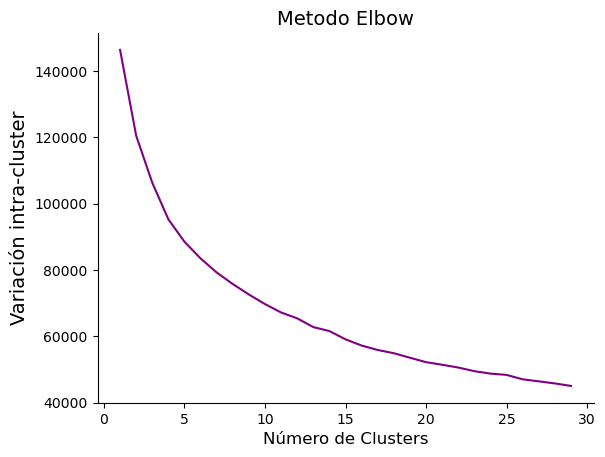

In [7]:
wcss = []
for i in range(1, 30):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(datosestand)
    wcss.append(km.inertia_)
plt.plot(range(1, 30), wcss, c="purple")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Metodo Elbow', size=14)
plt.xlabel('Número de Clusters', size=12)
plt.ylabel('Variación intra-cluster', size=14)
plt.show()

Observamos que la caída en la variación intra-cluster es bastante constante, no hay un número de cluster bien definido que marque un cambio abrupto en la variación o sea no hay un "codo" bien delimitado. Sin embargo podemos quizás decir que a partir de 10 clusters la curva esta bastante aplanada.

#### Método silhouette

C:\Users\vicky\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vicky\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vicky\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vicky\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


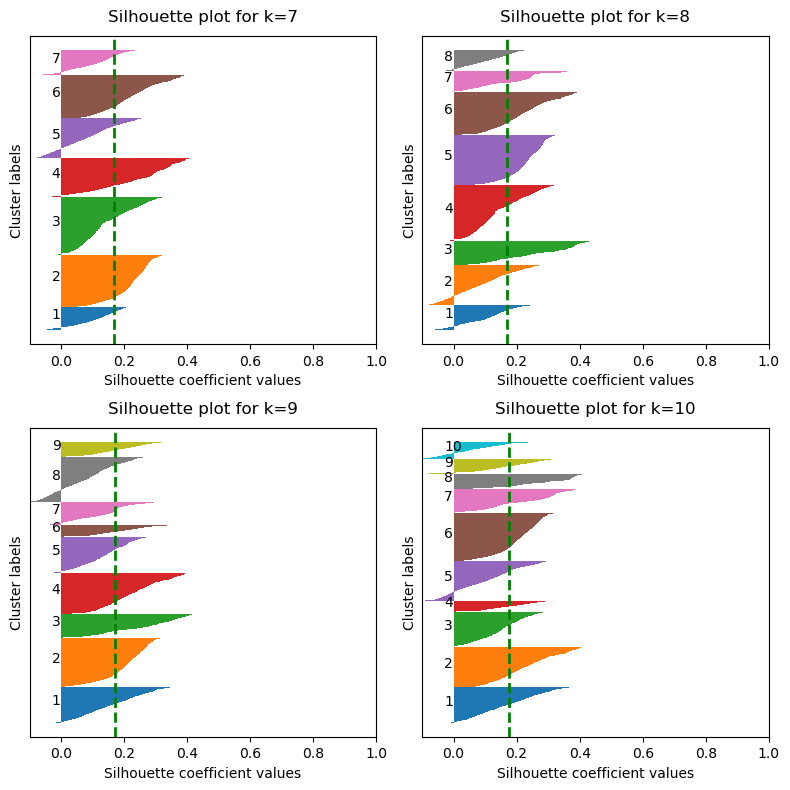

In [8]:
X_std = datosestand  
lista_k = [7,8, 9, 10]

# Crear una figura con 3 subplotsm, arreglados verticalmente( 1 columna y 3 filas)
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs = axs.flatten()  # Aplanamos el array 2D de axis para una mejor iteración 

for ax, k in zip(axs, lista_k):
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X_std)
    centroids = km.cluster_centers_

    silhouette_vals = silhouette_samples(X_std, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    avg_score = np.mean(silhouette_vals)
    ax.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax.set_yticks([])
    ax.set_xlim([-0.1, 1])
    ax.set_xlabel('Silhouette coefficient values')
    ax.set_ylabel('Cluster labels')
    ax.set_title(f'Silhouette plot for k={k}', y=1.02)


plt.tight_layout()
plt.show()

9 y 10 parecen ser numeros de clusters buenos La puntuación Silhouette para cada grupo está por encima de las puntuaciones promedio. Además, la fluctuación en el tamaño es algo similar.Para 9 clusters el grosor es más uniforme que el gráfico con 10. Por lo tanto, se puede seleccionar el número óptimo de grupos como 9.

## K-Means con k = 9

In [9]:
cluster9_km = KMeans(n_clusters=9, random_state=0)

In [10]:
cluster9_km.fit(datosestand)

C:\Users\vicky\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=9, random_state=0)

In [11]:
# Coordenadas de los 9 centroides
centroides9 = cluster9_km.cluster_centers_
print(centroides9 )

[[-3.17727693e-01  1.93160096e-01 -5.63994845e-01  2.90475407e-01
   3.59233311e-01  8.62549971e-01  7.45282284e-01 -1.05617053e-01
   8.69932666e-01 -1.35347311e-01  9.04322969e-01  1.33964033e+00
  -3.87918264e-01]
 [-2.90556026e-01 -9.40003668e-01  4.29983699e-01  5.78819629e-01
  -2.29767713e+00 -6.20387304e-01  3.17085988e-01  1.53572902e-03
  -5.22633261e-01 -2.57860201e-01 -2.45498807e-02 -5.86165704e-01
  -2.39867408e-01]
 [-3.23902785e-01  6.80543170e-01 -1.23759383e+00  1.40681773e-01
   4.06256350e-01  2.51040317e-01  2.53098508e-01 -1.54781669e-01
  -6.05888921e-01 -3.89793317e-01 -1.00410708e+00 -7.46469018e-01
  -4.43406813e-01]
 [-3.23627874e-01  1.08595689e+00  1.70565893e-01 -6.21072032e-01
   4.17791010e-01 -4.25306824e-01 -7.39590784e-01 -2.78851938e-02
   1.00607865e+00 -1.21513354e-01  9.04322969e-01  1.19877764e+00
  -4.72947320e-01]
 [-2.25428884e-01 -1.10216320e+00  4.39202658e-01 -1.65103003e+00
  -1.33096824e+00 -7.67412292e-01 -1.77931973e-01 -3.19754646e-01


In [12]:
# Prediciendo los clusters
labels = cluster9_km.predict(datosestand)
labels

array([4, 4, 4, ..., 3, 3, 3])

### Personas en cada cluster

In [13]:
# Cantidad de personas en cada cluster
copy =  pd.DataFrame()
copy['persona']=datosadultos.index.values
copy['label'] = labels
copy['dominio']=datosadultos['dominio'].values
copy['edad']=datosadultos['edad'].values
copy['situacion_conyugal']=datosadultos['situacion_conyugal'].values
copy['estado_ocupacional']=datosadultos['estado_ocupacional'].values
copy['estado_educativo']=datosadultos['estado_educativo'].values
copy['nivel_max_educativo']=datosadultos['nivel_max_educativo'].values
copy['años_escolaridad']=datosadultos['años_escolaridad'].values
copy['lugar_nacimiento']=datosadultos['lugar_nacimiento'].values
copy['cantidad_hijos_nac_vivos']=datosadultos['cantidad_hijos_nac_vivos'].values
copy[ 'ingresos_totales_USD_cat']=datosadultos[ 'ingresos_totales_USD_cat'].values
copy[ 'sexo_Mujer']=datosadultos[ 'sexo_Mujer'].values
copy['hijos_nacidos_vivos_Si']=datosadultos['hijos_nacidos_vivos_Si'].values
copy[ 'sist_de_salud_Sistema público']=datosadultos[ 'sist_de_salud_Sistema público'].values;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['grupo']=  np.array([0,1,2,3,4,5,6,7,8])
cantidadGrupo['cantidad de personas']=copy.groupby('label').size()
cantidadGrupo

,grupo,cantidad de personas
0,0,1680
1,1,963
2,2,1779
3,3,1555
4,4,947
5,5,1505
6,6,770
7,7,590
8,8,1465


### Registro representante de cada cluster

In [14]:
#vemos el representante del grupo, persona más cercana a su centroide
closest, _ = pairwise_distances_argmin_min(cluster9_km.cluster_centers_, datosestand)
closest

array([6414, 1329, 7475, 8102, 7118, 3024, 4435,  576, 3019], dtype=int64)

In [15]:
datosfiltrados.loc[:,'id-persona'] = datosfiltrados.index.values

C:\Users\vicky\AppData\Local\Temp\ipykernel_11880\3322780315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datosfiltrados.loc[:,'id-persona'] = datosfiltrados.index.values


In [16]:
conteo=0
for row in closest:
    print("CLUSTER",conteo)
    print(datosfiltrados.iloc[row])
    conteo= conteo+1

CLUSTER 0
dominio                             0
edad                               55
situacion_conyugal                  1
estado_ocupacional                  2
estado_educativo                    1
nivel_max_educativo                 5
años_escolaridad                   15
lugar_nacimiento                    1
cantidad_hijos_nac_vivos            2
ingresos_totales_USD_cat            2
sexo_Mujer                          1
hijos_nacidos_vivos_Si              1
sist_de_salud_Sistema público       0
id-persona                       9141
Name: 9141, dtype: int64
CLUSTER 1
dominio                             0
edad                               32
situacion_conyugal                  4
estado_ocupacional                  2
estado_educativo                    0
nivel_max_educativo                 1
años_escolaridad                   14
lugar_nacimiento                    2
cantidad_hijos_nac_vivos            0
ingresos_totales_USD_cat            2
sexo_Mujer                          1
hijos

## Ejemplo de información contenida en el Cluster 7

<span style= "color:purple ; font-size: 25px; font-weight:bold"> Analizar la caracteristicas de las personas del Cluster 7 </span>

In [17]:
group_referrer_index = copy['label'] == 7 #Cluster
group_referrals = copy[group_referrer_index] 

columnas = ['dominio', 'edad','situacion_conyugal', 'estado_ocupacional',
       'estado_educativo', 'nivel_max_educativo', 'años_escolaridad',
       'lugar_nacimiento', 'cantidad_hijos_nac_vivos',
       'ingresos_totales_USD_cat', 'sexo_Mujer', 'hijos_nacidos_vivos_Si', 'sist_de_salud_Sistema público']

dfcaracteristicas = pd.DataFrame()
for i in columnas:
    diversidadGrupo = pd.DataFrame()
    categorias = datosadultos[i].unique()
    n = len(categorias)
    variable =i
    diversidadGrupo['categorias']= categorias # Categorias de la variable
    diversidadGrupo['variable']= np.repeat(variable, n)
    diversidadGrupo['cantidad']=group_referrals.groupby(variable).size()
    dfcaracteristicas = pd.concat([dfcaracteristicas, diversidadGrupo], axis=0)

<span style= "color:purple ; font-size: 20px; font-weight:bold"> Cluster 7- Situación habitacional </span>
### Variable: dominio
**Categorías:**
  * 'Resto de la Ciudad': 0
  *  'Villas de emergencia': 1  
  

In [18]:
dfcaracteristicas[dfcaracteristicas['variable']=='dominio']

,categorias,variable,cantidad
0,0,dominio,NaN
1,1,dominio,590.0


El cluster esta completamente formado por personas que viven en Villas de emergencia

<span style= "color:purple ; font-size: 20px; font-weight:bold"> Cluster 7 - Situación civil</span>
### Variable: situacion_conyugal
**Categorías:**
  * 'Casado/a': 0
  * 'Divorciado/a': 1
  * 'No corresponde': 2
  * 'Separado/a de unión o matrimonio': 3
  * 'Soltero/a': 4
  * 'Unido/a': 5
  * 'Viudo/a': 6


In [19]:
dfcaracteristicas[dfcaracteristicas['variable']=='situacion_conyugal']

,categorias,variable,cantidad
0,4,situacion_conyugal,103.0
1,6,situacion_conyugal,4.0
2,5,situacion_conyugal,NaN
3,3,situacion_conyugal,40.0
4,1,situacion_conyugal,213.0
5,0,situacion_conyugal,225.0


El cluster esta en su mayoría formado por personas casadas, divorciadas y solteras

<span style= "color:purple ; font-size: 20px; font-weight:bold"> Cluster 7 - Situación laboral </span>

### Variable: estado_ocupacional
**Categorías:**
  * 'Desocupado': 0
  * 'Inactivo': 1
  * 'Ocupado': 2  

In [20]:
dfcaracteristicas[dfcaracteristicas['variable']=='estado_ocupacional']

,categorias,variable,cantidad
0,1,estado_ocupacional,70.0
1,2,estado_ocupacional,102.0
2,0,estado_ocupacional,418.0


<span style= "color:purple ; font-size: 20px; font-weight:bold"> Cluster 7 - Situación laboral </span>

 ### Variable: ingresos_totales_USD_cat
**Categorías:**
  * 'Ingreso alto': 0
  * 'Ingreso bajo': 1
  * 'Ingreso medio': 2
  * 'Ingreso muy bajo': 3
  * 'Ingreso nulo': 4  

In [21]:
dfcaracteristicas[dfcaracteristicas['variable'] == 'ingresos_totales_USD_cat' ]

,categorias,variable,cantidad
0,3,ingresos_totales_USD_cat,1.0
1,4,ingresos_totales_USD_cat,193.0
2,2,ingresos_totales_USD_cat,67.0
3,1,ingresos_totales_USD_cat,220.0
4,0,ingresos_totales_USD_cat,109.0


El cluster esta en su mayoría formado por personas desocupadas y con ingresos nulos a bajos

<span style= "color:purple ; font-size: 20px; font-weight:bold"> Cluster 7 - Situación educativa</span>
### Variable: estado_educativo
**Categorías:**
  * 'Asiste': 0
  * 'No asiste pero asistió': 1
  * 'Nunca asistio': 2   

In [22]:
dfcaracteristicas[dfcaracteristicas['variable']== 'estado_educativo']

,categorias,variable,cantidad
0,0,estado_educativo,103.0
1,1,estado_educativo,481.0
2,2,estado_educativo,6.0


<span style= "color:purple ; font-size: 20px; font-weight:bold"> Cluster 7 - Situación educativa</span>

 ### Variable: nivel_max_educativo
**Categorías:**
  * 'EGB (1° a 9° año)': 0
  * 'Otras escuelas especiales': 1
  * 'Primario comun': 2
  * 'Primario especial': 3
  * 'Sala de 5': 4
  * 'Secundario/medio comun': 5
  * 'Todavía no alcanzó ninguno': 6

In [23]:
dfcaracteristicas[dfcaracteristicas['variable']== 'nivel_max_educativo' ]

,categorias,variable,cantidad
0,1,nivel_max_educativo,198.0
1,5,nivel_max_educativo,65.0
2,0,nivel_max_educativo,110.0
3,3,nivel_max_educativo,137.0
4,2,nivel_max_educativo,58.0
5,6,nivel_max_educativo,14.0
6,4,nivel_max_educativo,8.0


El cluster esta en su mayoría formado por personas que no asisten pero asistieron a algún nivel educativo, la mayoría asistió o asiste a otras escuelas especiales, EGB o primarios especiales

 ### Variable: años_escolaridad

In [24]:
dfcaracteristicas[dfcaracteristicas['variable']=='años_escolaridad']

,categorias,variable,cantidad
0,12,años_escolaridad,9.0
1,17,años_escolaridad,7.0
2,8,años_escolaridad,10.0
3,11,años_escolaridad,14.0
4,13,años_escolaridad,5.0
5,7,años_escolaridad,14.0
6,9,años_escolaridad,7.0
7,16,años_escolaridad,126.0
8,14,años_escolaridad,30.0
9,15,años_escolaridad,60.0


El cluster esta formado por personas que asisitieron un rango de tiempo variado a instituciones educativas

<span style= "color:purple ; font-size: 20px; font-weight:bold"> Cluster 7 - Situación demográfica </span>

### Variable: sexo_Mujer
**Categorías:**
  * 'No': 0
  * 'Si': 1  
  

In [25]:
dfcaracteristicas[dfcaracteristicas['variable']=='sexo_Mujer']

,categorias,variable,cantidad
0,1,sexo_Mujer,494.0
1,0,sexo_Mujer,96.0


<span style= "color:purple ; font-size: 20px; font-weight:bold"> Cluster 7 - Situación demográfica </span>
  
### Variable: lugar_nacimiento
**Categorías:**
  * 'CABA': 0
  * 'Otra provincia': 1
  * 'PBA excepto GBA': 2
  * 'PBA sin especificar': 3
  * 'Pais limitrofe': 4
  * 'Pais no limitrofe': 5
  * 'Partido GBA': 6    

In [26]:
dfcaracteristicas[dfcaracteristicas['variable']== 'lugar_nacimiento']

,categorias,variable,cantidad
0,2,lugar_nacimiento,172.0
1,1,lugar_nacimiento,67.0
2,0,lugar_nacimiento,8.0
3,6,lugar_nacimiento,NaN
4,5,lugar_nacimiento,293.0
5,4,lugar_nacimiento,39.0
6,3,lugar_nacimiento,11.0


<span style= "color:purple ; font-size: 20px; font-weight:bold"> Cluster 7 - Situación demográfica </span>
  
 ### Variable: 'hijos_nacidos_vivos_Si'
**Categorías:**
  * 'No': 0
  * 'Si': 1 

In [27]:
dfcaracteristicas[dfcaracteristicas['variable']== 'hijos_nacidos_vivos_Si']

,categorias,variable,cantidad
0,0,hijos_nacidos_vivos_Si,590.0
1,1,hijos_nacidos_vivos_Si,NaN


El cluster cero esta en su mayoría formado por personas mujeres sin hijos provenientes de países no limítrofes y CABA


 ### Variable: edad

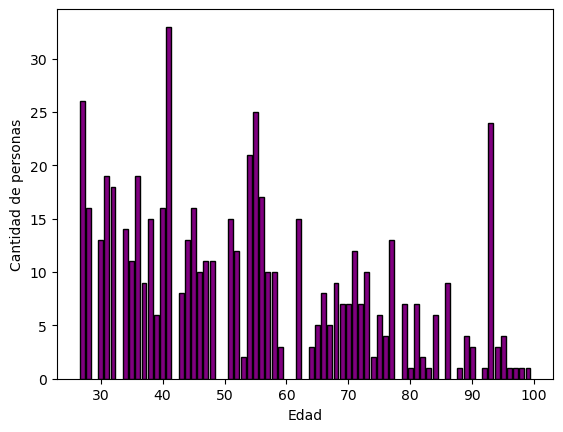

In [28]:
edad= (dfcaracteristicas[dfcaracteristicas['variable']=='edad']).dropna()
plt.bar(edad['categorias'], edad['cantidad'], color='purple', edgecolor='black')
plt.ylabel("Cantidad de personas")
plt.xlabel("Edad")
plt.show()

 ### Variable: cantidad_hijos_nac_vivos

In [29]:
dfcaracteristicas[dfcaracteristicas['variable']=='cantidad_hijos_nac_vivos']

,categorias,variable,cantidad
0,0,cantidad_hijos_nac_vivos,590.0
1,2,cantidad_hijos_nac_vivos,NaN
2,1,cantidad_hijos_nac_vivos,NaN
3,3,cantidad_hijos_nac_vivos,NaN
4,5,cantidad_hijos_nac_vivos,NaN
5,7,cantidad_hijos_nac_vivos,NaN
6,4,cantidad_hijos_nac_vivos,NaN
7,6,cantidad_hijos_nac_vivos,NaN
8,9,cantidad_hijos_nac_vivos,NaN
9,8,cantidad_hijos_nac_vivos,NaN


El Cluster contiene a personas que no tuvieron hijos

 ### Variable: sist_de_salud_Sistema público
**Categorías:**
  * 'No': 0
  * 'Si': 1

In [30]:
dfcaracteristicas[dfcaracteristicas['variable']=='sist_de_salud_Sistema público']

,categorias,variable,cantidad
0,0,sist_de_salud_Sistema público,174.0
1,1,sist_de_salud_Sistema público,416.0


La mayoría de las personas del cluster se atienden en el sistema público de salud 

## Visualización

In [31]:
datosestand[11000]

array([-0.3258112 ,  2.05647942, -1.32123762, -0.9714365 ,  0.4108238 ,
       -0.39827541, -1.58489843, -0.73955515, -0.60588892,  0.91302929,
        0.90432297, -0.74646902, -0.48763866])

In [32]:
# Obtener las etiquetas de los clusters
labels = cluster9_km.labels_

# Agregar las etiquetas al DataFrame original para visualización
datosfiltrados.loc[:,'Cluster'] = labels

C:\Users\vicky\AppData\Local\Temp\ipykernel_11880\729263808.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datosfiltrados.loc[:,'Cluster'] = labels


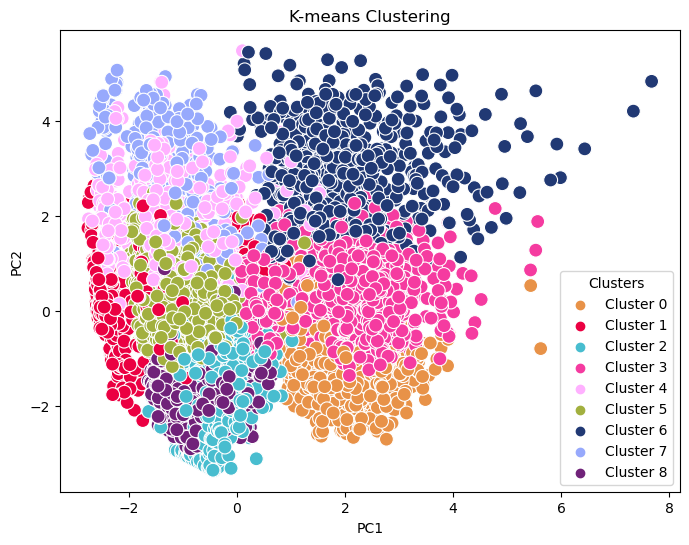

In [33]:
# Obtener las etiquetas de los clusters
labels = cluster9_km.labels_

# Agregar las etiquetas al DataFrame original para visualización
datosfiltrados.loc[:,'Cluster'] = labels

# Reducir la dimensionalidad a 2D para visualización si es necesario
pca = PCA(n_components=2)
z2_pca = pca.fit_transform(datosestand)

# Crear un DataFrame con las componentes principales
df_pca = pd.DataFrame(data=z2_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = labels

paleta = ["#E89248", "#EB0042", "#48BDCF", "#F53BA0", "#FFB1FF", "#A2B03F", "#213974", "#97A9FC", "#702279"]

# Visualizar los clusters
plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette=paleta, s=100, legend='full')

# Añadir la leyenda personalizada
handles, _ = scatter.get_legend_handles_labels()
scatter.legend(handles, [f'Cluster {i}' for i in range(len(paleta))], title='Clusters')


plt.title('K-means Clustering')
plt.show()

### Visualización en 3D

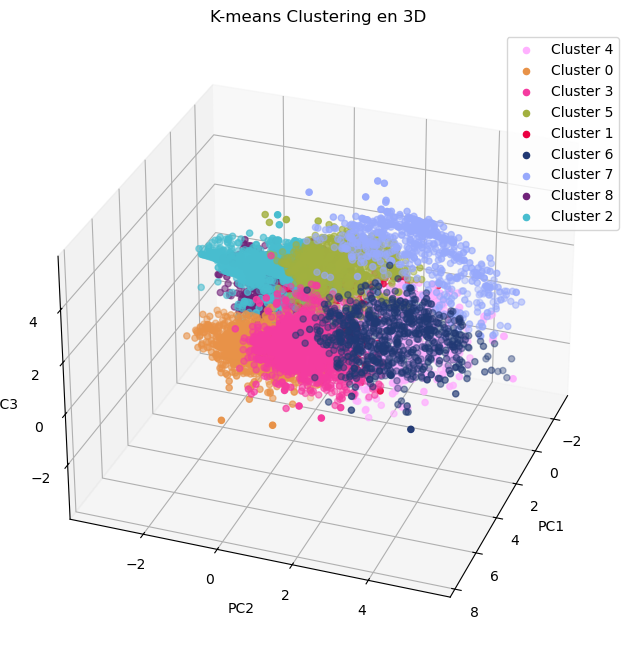

In [34]:
# Reducir la dimensionalidad a 3 componentes principales con PCA
pca = PCA(n_components=3)
z3_pca = pca.fit_transform(datosestand)

# Crear un DataFrame con las componentes principales
df_pca = pd.DataFrame(data=z3_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['Cluster'] = labels

# Paleta de colores para los clusters
paleta = ["#E89248", "#EB0042", "#48BDCF", "#F53BA0", "#FFB1FF", "#A2B03F", "#213974", "#97A9FC", "#702279"]
# Visualizar los clusters en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Asignar colores según el cluster
colors = sns.color_palette(paleta, len(df_pca['Cluster'].unique()))

# Graficar los puntos 3D
for cluster_id in df_pca['Cluster'].unique():
    cluster_data = df_pca[df_pca['Cluster'] == cluster_id]
    ax.scatter(cluster_data['PC1'], cluster_data['PC2'], cluster_data['PC3'], 
               label=f'Cluster {cluster_id}', 
               color=colors[cluster_id], s=20)

# Etiquetas y título
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('K-means Clustering en 3D')

# Cambiar ángulo de visualización (elevación y azimut)
ax.view_init(elev=30, azim=20)  # Puedes ajustar estos valores según lo desees

# Leyenda
ax.legend()

# Mostrar gráfico
plt.show()

## DBSCAN

## Estimar el mejor eps

Referencia: https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf 

In [35]:
from sklearn.neighbors import NearestNeighbors 
neigh = NearestNeighbors(n_neighbors=2)

In [36]:
nbrs = neigh.fit(datosestand)

In [37]:
distances, indices = nbrs.kneighbors(datosestand)

In [38]:
distances = np.sort(distances, axis=0)

In [39]:
distances = distances[:,1]

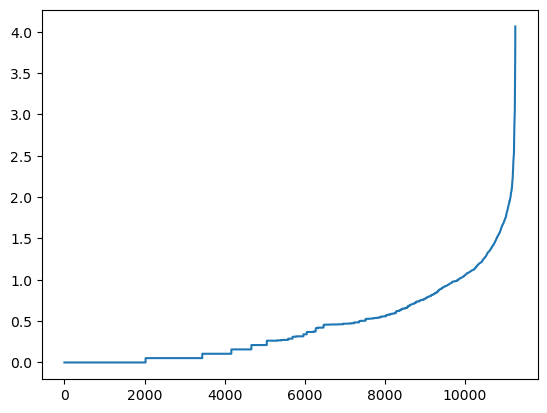

In [40]:
plt.plot(distances)

El gráfico nos muestra que un eps entre 1 y 1.5 sería óptimo

In [41]:
db_1 = DBSCAN(eps=1.5, min_samples=50) # eps: radio de la vecindad, min_samples: número mínimo de puntos para formar un cluster
db_2 = DBSCAN(eps=1.25, min_samples=50)
db_3 = DBSCAN(eps=1.0, min_samples=50)

In [42]:
# Realizamos el entrenamiento de los modelos instanciados
db_1.fit(datosestand)
db_2.fit(datosestand)
db_3.fit(datosestand)

DBSCAN(eps=1.0, min_samples=50)

### Primer modelo eps =  1.5

In [43]:
# Consultamos las etiquetas del primer modelo
labels_1 = db_1.labels_ # Etiquetas de cada punto de datos (componente conectada) en el rango [0, n_clusters-1] o -1 si el punto de datos no está en ningún grupo.

# Número de clusters en las etiquetas, ignorando el ruido en caso que esté presente.
n_clusters_1 = len(set(labels_1)) - (1 if -1 in labels_1 else 0) # set(labels_1): conjunto de etiquetas únicas, len(set(labels_1)): número de etiquetas únicas, -1 in labels_1: True si -1 está en labels_1, False si no está
n_noise_1 = list(labels_1).count(-1) # list(labels_1): lista de etiquetas, list(labels_1).count(-1): número de veces que aparece -1 en la lista de etiquetas

In [44]:
# Consultamos para el primer modelo

print('Número estimado de clusters: %d' % n_clusters_1) # n_clusters_1: número de clusters
print('Número estimado de puntos de ruido: %d' % n_noise_1) # n_noise_1: número de puntos de ruido

Número estimado de clusters: 12
Número estimado de puntos de ruido: 4064


### Primer modelo eps =  1.25

In [45]:
# Consultamos las etiquetas del segundo modelo
labels_2 = db_2.labels_ # Etiquetas de cada punto de datos (componente conectada) en el rango [0, n_clusters-1] o -1 si el punto de datos no está en ningún grupo.

# Número de clusters en las etiquetas, ignorando el ruido en caso que esté presente.
n_clusters_2= len(set(labels_2)) - (1 if -1 in labels_2 else 0) # set(labels_1): conjunto de etiquetas únicas, len(set(labels_1)): número de etiquetas únicas, -1 in labels_1: True si -1 está en labels_1, False si no está
n_noise_2 = list(labels_2).count(-1) # list(labels_1): lista de etiquetas, list(labels_1).count(-1): número de veces que aparece -1 en la lista de etiquetas

In [46]:
# Consultamos para el segundo modelo

print('Número estimado de clusters: %d' % n_clusters_2) # n_clusters_2: número de clusters
print('Número estimado de puntos de ruido: %d' % n_noise_2) # n_noise_2: número de puntos de ruido

Número estimado de clusters: 19
Número estimado de puntos de ruido: 5619


### Primer modelo eps =  1.00

In [47]:
# Consultamos las etiquetas del tercer modelo
labels_3 = db_3.labels_ # Etiquetas de cada punto de datos (componente conectada) en el rango [0, n_clusters-1] o -1 si el punto de datos no está en ningún grupo.

# Número de clusters en las etiquetas, ignorando el ruido en caso que esté presente.
n_clusters_3 = len(set(labels_3)) - (1 if -1 in labels_3 else 0) # set(labels_1): conjunto de etiquetas únicas, len(set(labels_1)): número de etiquetas únicas, -1 in labels_1: True si -1 está en labels_1, False si no está
n_noise_3 = list(labels_3).count(-1) # list(labels_1): lista de etiquetas, list(labels_1).count(-1): número de veces que aparece -1 en la lista de etiquetas

In [48]:
# Consultamos para el tercer modelo

print('Número estimado de clusters: %d' % n_clusters_3) # n_clusters_3: número de clusters
print('Número estimado de puntos de ruido: %d' % n_noise_3) # n_noise_3: número de puntos de ruido

Número estimado de clusters: 12
Número estimado de puntos de ruido: 7473


## Visualizaciones 


C:\Users\vicky\AppData\Local\Temp\ipykernel_11880\1161234083.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datosfiltrados['Cluster'] = labels


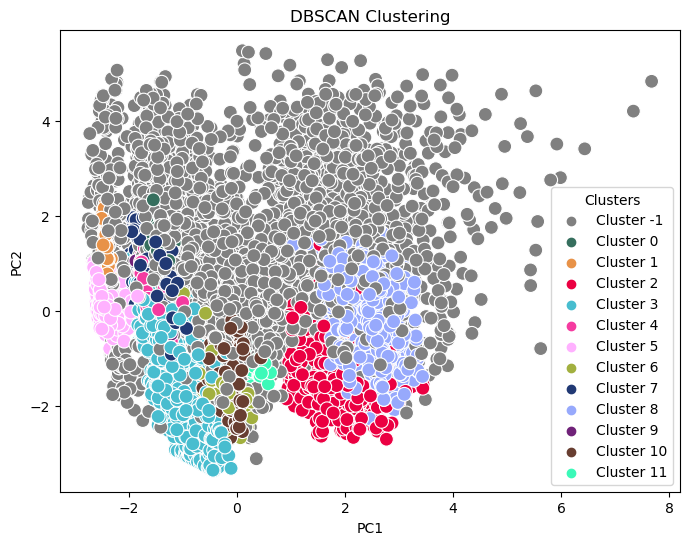

In [49]:
# Aplicar DBSCAN
labels = db_1.fit_predict(datosestand)

# Agregar las etiquetas al DataFrame original para visualización
datosfiltrados['Cluster'] = labels

# Reducir la dimensionalidad a 2D para visualización
pca = PCA(n_components=2)
z2_pca = pca.fit_transform(datosestand)

# Crear un DataFrame con las componentes principales
df_pca = pd.DataFrame(data=z2_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = labels

# Paleta de colores para los clusters (incluyendo el color para el ruido)
paleta = ["grey", "#366F5E", "#E89248", "#EB0042", "#48BDCF", "#F53BA0", "#FFB1FF", "#A2B03F", "#213974", "#97A9FC", "#702279" ,"#683E31", "#3BF9B8"]

# Visualizar los clusters
plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette=paleta, s=100, legend='full')

# Añadir la leyenda personalizada
handles, _ = scatter.get_legend_handles_labels()
scatter.legend(handles, [f'Cluster {i}' for i in range(-1, len(paleta)-1)], title='Clusters')

plt.title('DBSCAN Clustering')
plt.show()

### Visualización en 3D

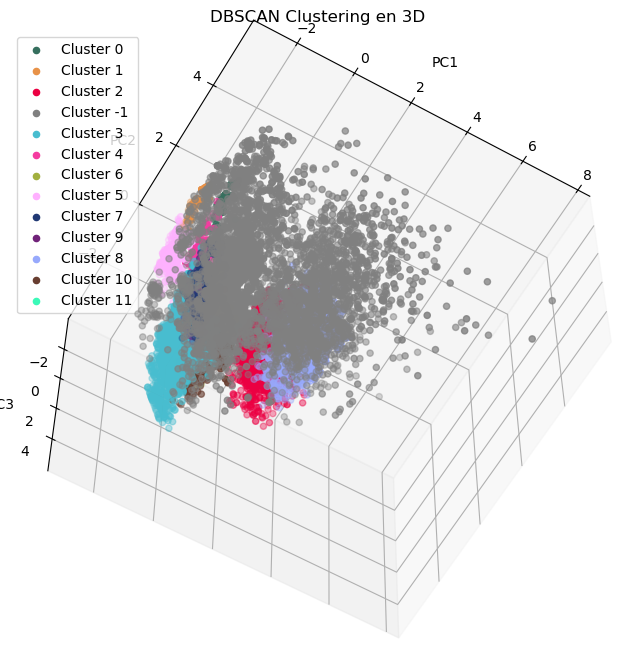

In [50]:
# definimos la paleta de colores
paleta2 = ["#366F5E", "#E89248", "#EB0042", "#48BDCF", "#F53BA0", "#FFB1FF", "#A2B03F", "#213974", "#97A9FC", "#702279" ,"#683E31", "#3BF9B8","grey"]

# Sacar las etiquetas de los clusters
labels = db_1.fit_predict(datosestand) 

# Reducir la dimensionalidad a 3 componentes principales con PCA
pca = PCA(n_components=3)
z4_pca = pca.fit_transform(datosestand)

# Crear un DataFrame con las componentes principales
df_pca = pd.DataFrame(data=z4_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['Cluster'] = labels

# Visualizar los clusters en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Asignar colores según el cluster
colors = sns.color_palette(paleta2, len(df_pca['Cluster'].unique()))

# Graficar los puntos 3D
for cluster_id in df_pca['Cluster'].unique():
    cluster_data = df_pca[df_pca['Cluster'] == cluster_id]
    ax.scatter(cluster_data['PC1'], cluster_data['PC2'], cluster_data['PC3'], 
               label=f'Cluster {cluster_id}', 
               color=colors[cluster_id], s=20)

# Etiquetas y título
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('DBSCAN Clustering en 3D')

# Cambiar ángulo de visualización (elevación y azimut)
ax.view_init(elev=-600, azim=300)  # Puedes ajustar estos valores según lo desees

# Leyenda
ax.legend()

# Mostrar gráfico
plt.show()

# Conclusiones 

Como señalamos en nuestro objetivo, nosotras buscábamos agrupar personas de acuerdo a características socio-económicas, educativas, demográficas, para esto utilizamos dos algoritmos de clustering DBSCAN y K Means, con estos algoritmos buscabamos definir clusters bien separados y compactos (esto nos indica una agrupación clara y significativa dentro del espacio de variables seleccionadas). En este sentido el algoritmo K Means nos proporcionó grupos mejor definidos que el algoritmo DBSCAN (al menos a partir de la visualización de los clusters en el espacio). Sin embargo, es importante nombrar que nuestros datos se encuentran distribuidos muy densamente en el espacio y el algoritmo DBSCAN señala que existe mucho ruido. La densidad de datos y la presencia de ruido lleva a que, si bien K Means al parecer defina mejor los clusters, estos esten muy superpuestos entre sí y que por lo tanto la pertenencia de un registro a un cluster o no, no sea tan precisa. Para mejorar el clustering planteamos reducir la dimensionalidad, las opciones para llevar a cabo esto podrían ser:
 * Reducir el número de variables a una variable por factor importante, es decir una variable que indique el nivel educativo, un variable que indique la condición laboral, etc. Reducir el número de variables permitirá que los registros tengan menor redundancias entre sí. Esta opción estaría justificada ya que nuestro espacio de variables no es muy numeroso
 * Aplicar PCA u otro algoritmo de reducción de dimensionalidad. En el caso de PCA no se eliminan las variables, si no que se reducen a "nuevas variables" o componentes los cuales tienen representadas las variables originales de forma no correlacionada. En este sentido nos permitiría realizar el clustering sin perder la variación de los datos. 